In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, '../ML_Training')
from execute_model import model_load
from random import random
%matplotlib inline 
plate = np.load('../../../../../../../datax/scratch/pma/real_filtered_LARGE_HIP110750.npy')[0:5000]

1421
Creating True
(2, 6, 16, 4096)
(2, 6, 16, 4096) (2, 6, 16, 512)
(2, 6, 16, 512)
(12, 16, 512, 1)
Creating False
(12, 6, 16, 4096) (12, 6, 16, 512)
(12, 6, 16, 512)
Creating True
(6, 6, 16, 4096) (6, 6, 16, 512)
(6, 6, 16, 512)
(6, 6, 16, 4096) (6, 6, 16, 512)
(6, 6, 16, 512)
(12, 6, 16, 512, 1)


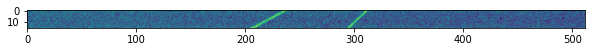

In [17]:
from skimage.transform import rescale, resize, downscale_local_mean
sys.path.insert(2, '../test_bench')
from data_generation import create_data_set
index = 1421
print(index)
data, false_data, true_data = create_data_set(plate, NUM_SAMPLES=2, snr_base=20, snr_range = 10, factor=1)
plt.figure(figsize=(10,10))
plt.imshow(data[0,:,:], )
plt.show()


In [20]:
encoder = model_load('VAE-BLPC1-ENCODER_compressed_512v15-0.h5')
vector = encoder.predict(data[0:1,:,:])[2]
print(vector)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
tensorflow      INFO     Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
tensorflow      WARNING  No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
[[-2.4189746  -0.10686257  0.7723911   0.34870872 -0.5858823  -0.13907716
  -0.7405019  -0.45326734]]


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
tensorflow      INFO     Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
tensorflow      WARNING  No training configuration found in the save file, so the model was *not* compiled. Compile it manually.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


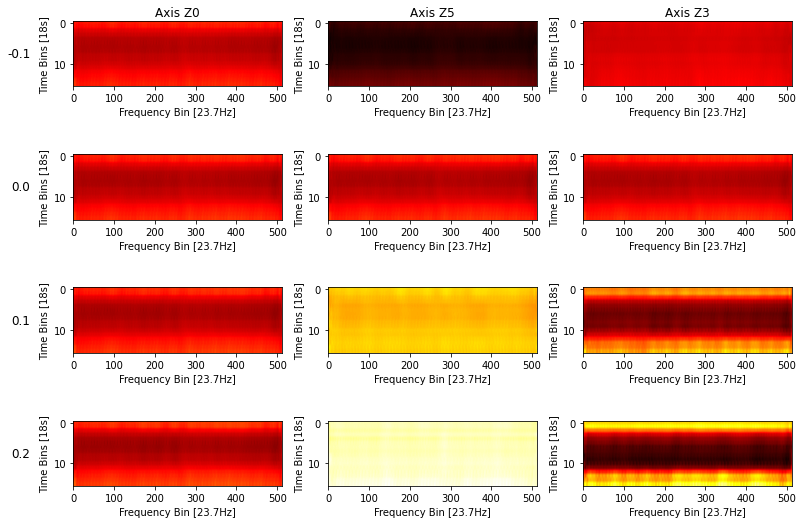

In [42]:
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

decoder = model_load('VAE-BLPC1-ENCODER_compressed_512v15-decoder-0.h5')

axis = [0,5,3]


rows = 4
col = 3
feature = np.zeros((rows, col,1,8))
matrix = np.zeros((rows, col, 16,512))
adjustment = []
for i in range(rows):
    adjustment.append(str(0.1*(i-1)))
    for j in range(col):
        feature[i,j,:,:] = deepcopy(vector)
        feature[i,j,0,axis[j]]= feature[i,j,0,axis[j]] +0.1*(i-1)
#         feature[i,j,0,axis[j]]= feature[i,j,0,axis[j]] +feature[i,j,0,axis[j]] *1*(i-1)
#         print(decoder.predict(feature[i,j,:,:])[0,:,:,0].shape)
        matrix[i,j,:,:] = decoder.predict(feature[i,j,:,:])[0,:,:,0]

cols = ['Axis Z'+str(axis[0]), 'Axis Z'+str(axis[1]), 'Axis Z'+str(axis[2])]
rows =adjustment

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
plt.setp(axes.flat, xlabel='Frequency Bin [23.7Hz]', ylabel='Time Bins [18s]')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

for i in range(len(rows)):
    for j in range(len(cols)):
        axes[i,j].imshow(matrix[i,j,:,:], CMAP='hot',aspect=10, vmin = matrix.min(), vmax = matrix.max())
    
fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


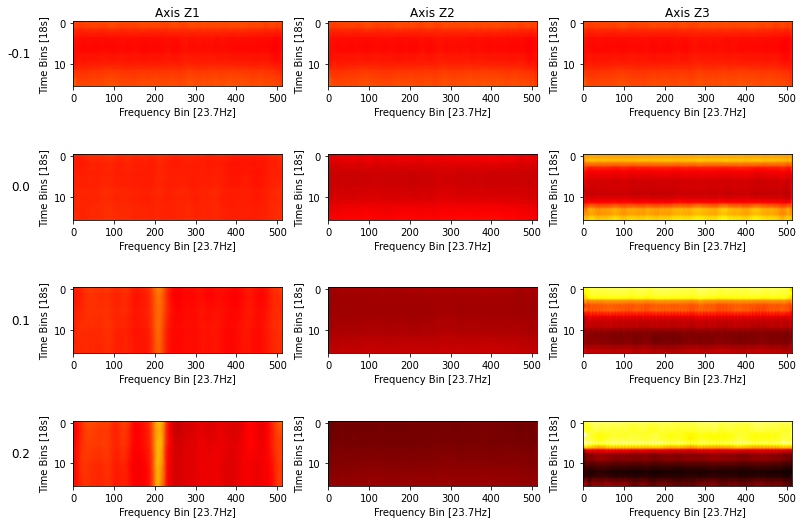

In [33]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy


cols = ['Axis Z1', 'Axis Z2', 'Axis Z3']
rows = ['-0.1', '0.0','0.1','0.2' ]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
plt.setp(axes.flat, xlabel='Frequency Bin [23.7Hz]', ylabel='Time Bins [18s]')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

for i in range(len(rows)):
    for j in range(len(cols)):
        axes[i,j].imshow(matrix[i,j,:,:], CMAP='hot',aspect=10, vmin = matrix.min(), vmax = matrix.max())
    
fig.tight_layout()

fig.subplots_adjust(left=0.15, top=0.95)

plt.show()


# Control Structure


In [2]:
encoder = model_load('../test_bench/VAE-BLPC1-ENCODER_compressed_512v13-0.h5')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


In [4]:
from preprocess_dynamic import pre_proc
from skimage.transform import rescale, resize, downscale_local_mean
data_preproc = np.zeros((5000, 6, 16, 512))
for i in range(plate.shape[0]):
    data_preproc[i, :,:,:] = pre_proc(downscale_local_mean(plate[i,: :,:],(1,1,8)))

In [11]:
vector_stack = encoder.predict(data_preproc[:,2,:,:], batch_size=5000)[2]
print(vector_stack.shape)

(5000, 8)


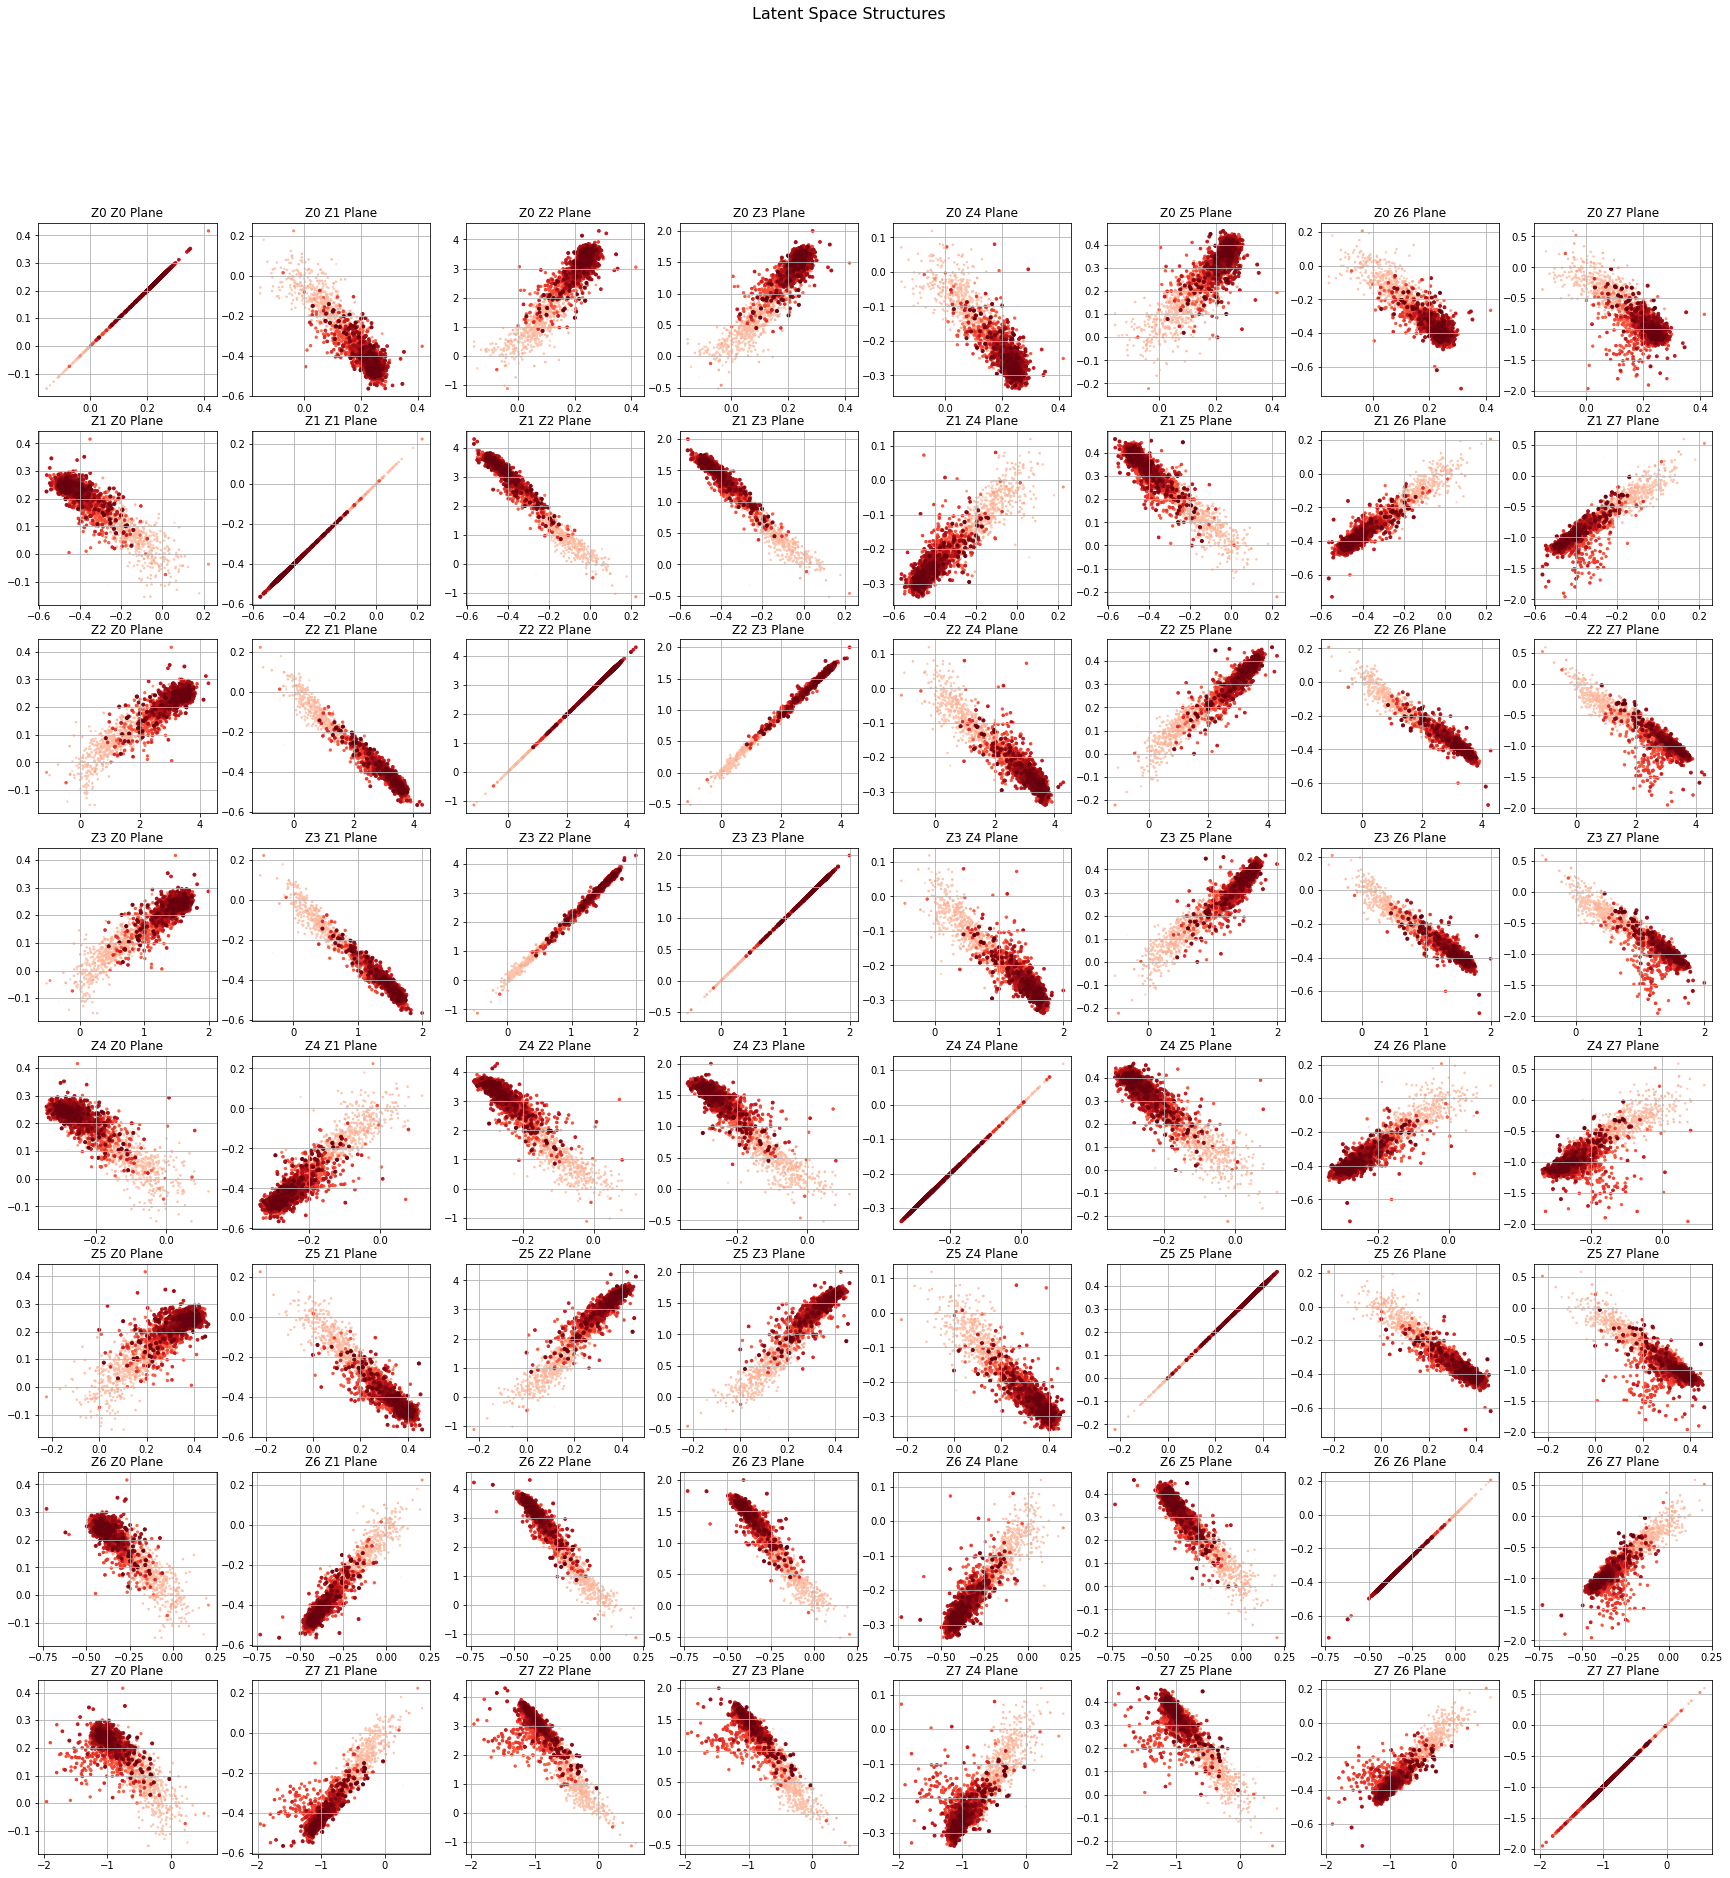

In [15]:
%matplotlib inline
def plot_cadence(vector_stack, freq):
    fig, ax = plt.subplots(8, 8, figsize=(30,30))
    fig.suptitle('Latent Space Structures', fontsize=16)
    for i in range(8):
        for j in range(8):
            ax[i,j].scatter(vector_stack[:,i],vector_stack[:,j], c=freq*5,s=freq*10, cmap='Reds' )
            ax[i,j].grid()
            ax[i,j].title.set_text("Z"+str(i)+" Z"+str(j)+' Plane')
    plt.show()
size = np.arange(0,vector_stack.shape[0])
plot_cadence(vector_stack, size/vector_stack.shape[0])

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
result = pca.fit_transform(vector_stack)
print(result.shape)
size = np.arange(0,result.shape[0])
print(size/result.shape[0])

(5000, 3)
[0.000e+00 2.000e-04 4.000e-04 ... 9.994e-01 9.996e-01 9.998e-01]


Text(0.5, 0, '$Z$')

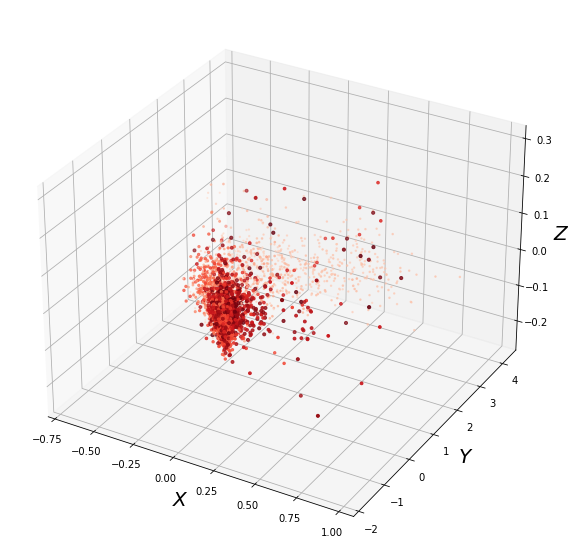

In [113]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = result[:,2]
xdata = result[:,1]
ydata = result[:,0]
ax.scatter3D(xdata, ydata, zdata,s= size/result.shape[0]*10, c=size/result.shape[0], cmap='Reds')
ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)

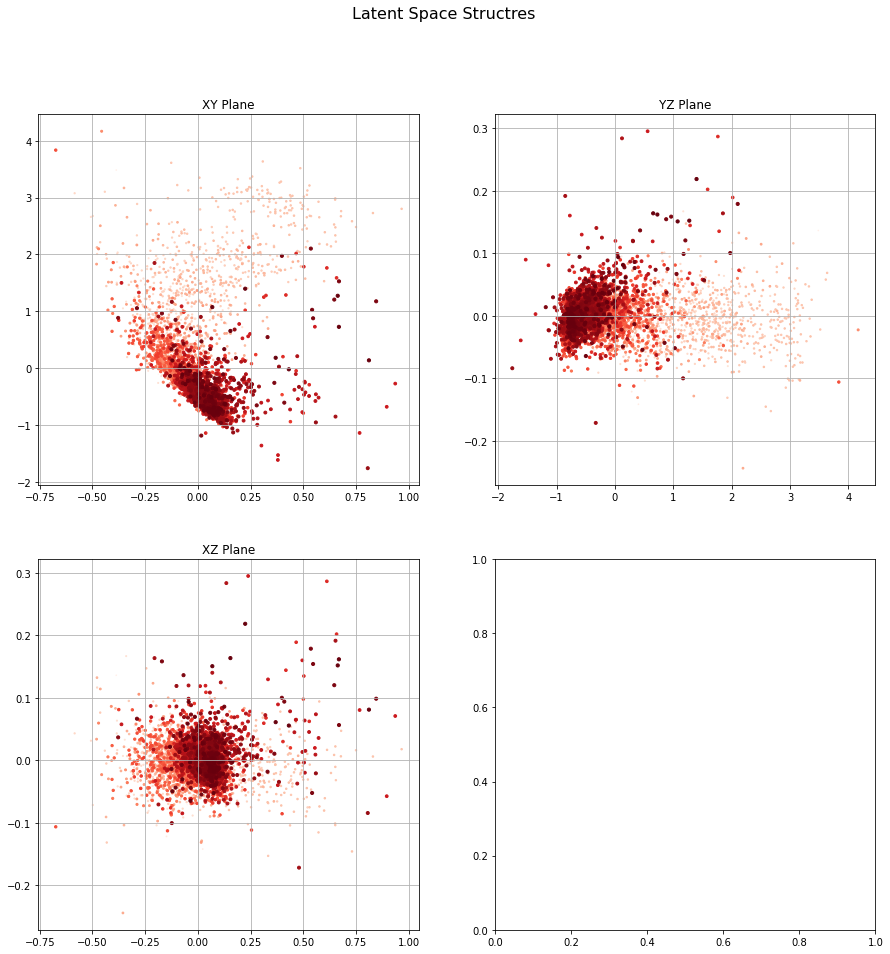

In [114]:
def plot_cadence(x,y,z, freq):
    fig, ax = plt.subplots(2, 2, figsize=(15,15))
    fig.suptitle('Latent Space Structures', fontsize=16)
    ax[0,0].scatter(x,y, c=freq*5,s=freq*10, cmap='Reds' )
    ax[1,0].scatter(x,z, c=freq*5,s=freq*10, cmap='Reds' )
    ax[0,1].scatter(y,z, c=freq*5,s=freq*10, cmap='Reds' )
    ax[0,1].title.set_text('YZ Plane')
    ax[1,0].title.set_text('XZ Plane')
    ax[0,0].title.set_text('XY Plane')
    ax[0,1].grid()
    ax[1,0].grid()
    ax[0,0].grid()
    plt.show()

plot_cadence(xdata, ydata, zdata, size/result.shape[0])